In [36]:
from music21 import *
# from music21.midi.realtime import StreamPlayer

## Utils

In [37]:
music_file_path = "Music/{}.mid"

In [38]:
def analyze_midi_score(midi_score):
    try:
        # Iterate through MIDI tracks and events
        for part_idx, part in enumerate(midi_score.parts):
            print(f"Track {part_idx + 1}:")

            for event in part.flat.notesAndRests:
                if event.isNote:
                    # Extract note information
                    note = event.pitch
                    duration = event.duration
                    print(f"Note: Pitch={note}, Duration={duration.quarterLength}")

                elif event.isStream and 'Instrument' in event.classes:
                    # Handle instrument changes
                    instrument = event.instrumentName
                    print(f"Instrument Change: {instrument}")

    except Exception as e:
        print(f"Error: {e}")

In [39]:
def see_midi_score(midi_score, size = 4):
    try:
        # Export the score to MusicXML format
        musicxml_path = 'output_score.xml'
        midi_score.write('musicxml', musicxml_path)

        # Print or further process the MusicXML file
        print(f"Score exported to {musicxml_path}")

        midi_xml = converter.parse(musicxml_path)
        # midi_xml.show('text')
        midi_xml.measures(1, size).show()

    except Exception as e:
        print(f"Error: {e}")

## Main Code

In [40]:
mond_3 = music_file_path.format('mond_3')

In [41]:
# Load the MIDI file and show the summary
mf = midi.MidiFile()
mf.open(mond_3)
mf.read()
mf.close()

midi_score = converter.parse(mond_3)

# mf.tracks[0].events

In [42]:
analyze_midi_score(midi_score)

Track 1:
Note: Pitch=G#2, Duration=0.25
Note: Pitch=C#3, Duration=0.25
Note: Pitch=E3, Duration=0.25
Note: Pitch=G#3, Duration=0.25
Note: Pitch=C#3, Duration=0.25
Note: Pitch=E3, Duration=0.25
Note: Pitch=G#3, Duration=0.25
Note: Pitch=C#4, Duration=0.25
Note: Pitch=E3, Duration=0.25
Note: Pitch=G#3, Duration=0.25
Note: Pitch=C#4, Duration=0.25
Note: Pitch=E4, Duration=0.25
Note: Pitch=G#3, Duration=0.25
Note: Pitch=C#4, Duration=0.25
Note: Pitch=E4, Duration=0.25
Note: Pitch=G#4, Duration=0.25
Note: Pitch=C#4, Duration=0.25
Note: Pitch=E4, Duration=0.25
Note: Pitch=G#4, Duration=0.25
Note: Pitch=C#5, Duration=0.25
Note: Pitch=E4, Duration=0.25
Note: Pitch=G#4, Duration=0.25
Note: Pitch=C#5, Duration=0.25
Note: Pitch=E5, Duration=0.25
Note: Pitch=G#4, Duration=0.25
Note: Pitch=C#5, Duration=0.25
Note: Pitch=E5, Duration=0.25
Note: Pitch=G#2, Duration=0.25
Note: Pitch=C3, Duration=0.25
Note: Pitch=E-3, Duration=0.25
Note: Pitch=G#3, Duration=0.25
Note: Pitch=C3, Duration=0.25
Note: Pitc

/home/bhavb/.local/lib/python3.10/site-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [43]:
print("Number of Parts:", len(midi_score.parts))
for part in midi_score.parts:
    print("Part:", part.partName)
    for element in part.notes:
        print(element)

Number of Parts: 2
Part: Piano right
Part: Piano left


In [44]:
# midi_score.show('midi')

Score exported to output_score.xml


/home/bhavb/.local/lib/python3.10/site-packages/music21/musicxml/xmlToM21.py:4848: MusicXMLWarning: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
  warnings.warn('Cannot put in an element with a missing voice tag when '


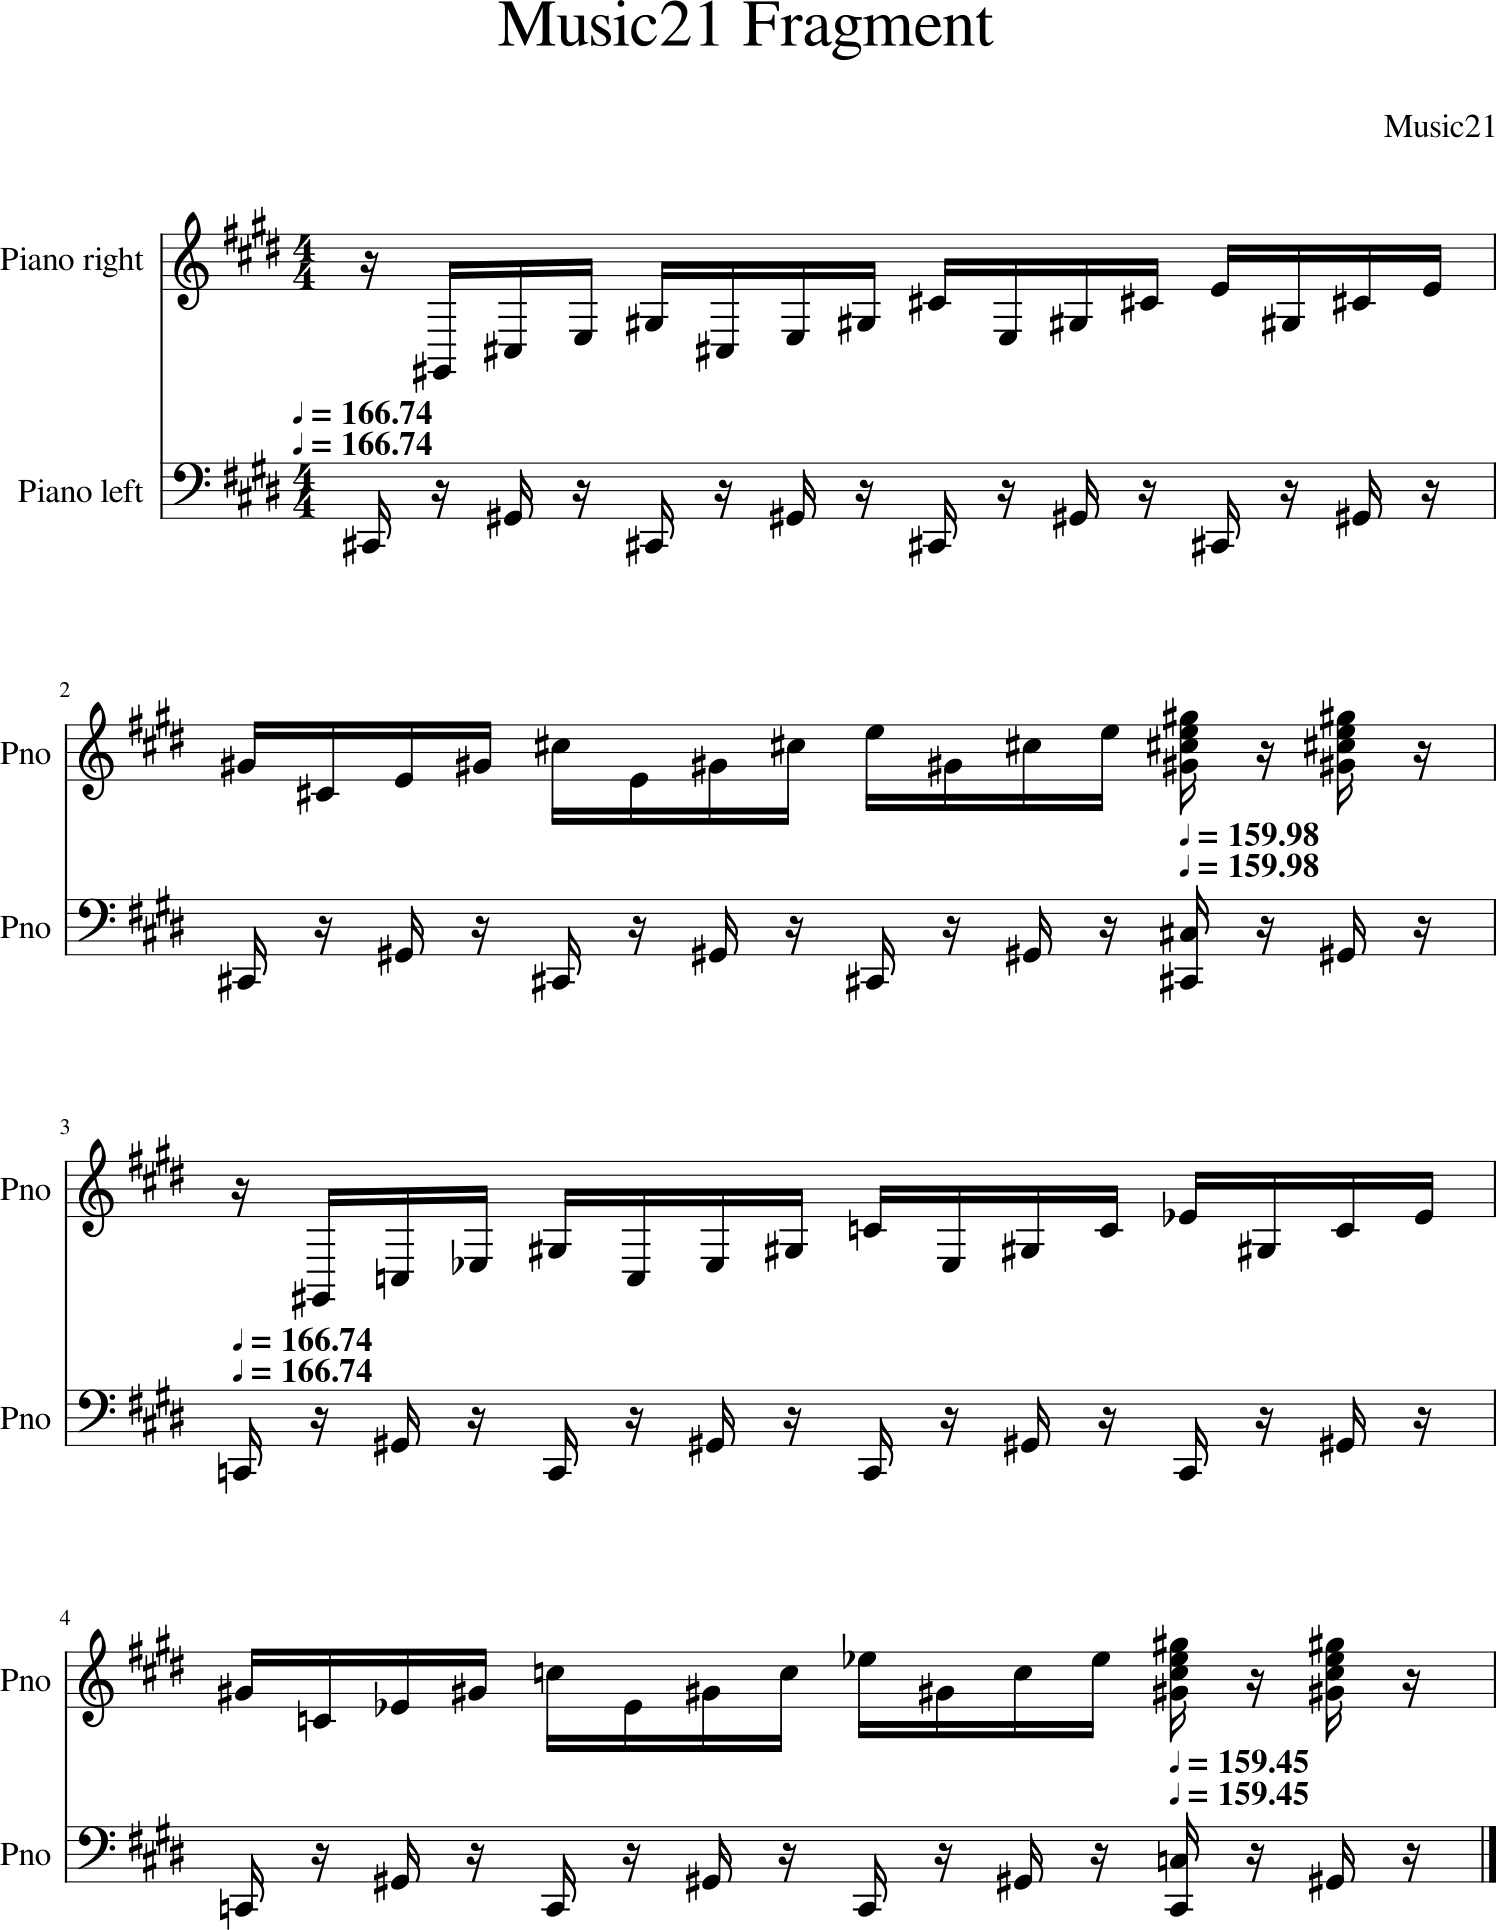

In [45]:
# midi_score.show()

# see_midi_score(midi_score)

In [46]:
# chords = midi_score.chordify()

# for m in chords.getElementsByClass('Measure'):
#     k = m.analyze('key')
#     print(m.number, k)

In [47]:
stream_left = midi_score.parts[1].flat.notesAndRests.stream()
stream_right = midi_score.parts[0].flat.notesAndRests.stream()

In [48]:
# stream_left.show('midi')
# stream_right.show('midi')

In [49]:
a = midi_score.parts[1][2]
for i in a:
    if isinstance(i, note.Note):
        print(i.pitch)
a

C2
G#2
C2
G#2
C2
G#2
C2
G#2


<music21.stream.Measure 3 offset=8.0>

In [53]:
noteFilter=stream.filters.ClassFilter('Note')
chordFilter=stream.filters.ClassFilter('Chord')

In [51]:
midi_stream=midi.translate.midiFileToStream(mf)

/home/bhavb/.local/lib/python3.10/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Mondscheinsonate; der Gr\xe4fin Giulietta Guiccardi gewidmet'>; getting generic Instrument
  warnings.warn(
/home/bhavb/.local/lib/python3.10/site-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1998 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
